# Building a deep neural network to detect vocalisation events of a critically endangered primate.

I've added this line because the code which is automatically downloaded uses an old function definition for librosa's resample function. So to easily fix this I am downgrading the version.

You definitely want to make this a GPU instance and not just CPU!

## Tasks:

*    You are provided with some audio dataset which has been manually annotated. You'll get the data once you execute the next couple of cells.
* The audio files are in the /Data/Audio folder.
* The annotations are in the /Data/Annotations folder
*    You should manually annotate one extra file, namely the file named ``HGSM3D_0+1_20160429_051600.wav``. Create a corresponding ``.svl`` file and add it to your folder. You will need to submit this ``.svl`` in your solution.
*    The audio data is already downsamples and a low-pass fitler has been applied. This is done in the ``Preprocessing.py`` file. You should probably take a moment to check this file. You most likely will not modify this file.
*    Another file is provided to you, namely, ``AnnotationReader.py``. You will most likely not modify this file. This file helps you read in the .svl file.
*    You will implement your own data augmentation techniques to balance out the dataset and create however many examples you want to train your model
*    You should compare 1D CNNs trained on amplitude values to 2D CNNs with mel spectrograms versus linear spectrograms. Compare your findings with respect to as many aspects as you think is scientifically correct.
*    Do not implement transfer learning.
*    Comment your code in detail based on PEP standards
* Submit your Colab notebook, and all other files to the tutors
* **Deadline**: Tuesday 6th at 21:30

In [ ]:
# You might need to restart the runtime after running this code. You'll only
# have to do this once per runtime. Once you restart, you do not need to run this again
!pip install librosa==0.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.1
    Uninstalling librosa-0.10.1:
      Successfully uninstalled librosa-0.10.1


## Step 0: Download data and code

You will need to authenticate with your aims.ac.za Google account. It will pop up for you and you just need to sign in.

In [ ]:
colab = True

In [ ]:
# This snippet of code can take up to 5 minutes or so.
# Plase allow this to complete.
if colab:
    !pip install SoundFile
    from google.colab import drive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    import zipfile

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download code files
    downloaded = drive.CreateFile({'id':"1js1fz4Bu98NIds4cErL7NdT1efxavixp"})
    downloaded.GetContentFile('Code.zip')

    # Extract files to temporary location in Google Drive
    with zipfile.ZipFile('Code.zip', 'r') as zip_file:
        zip_file.extractall()

    # Download data files
    downloaded = drive.CreateFile({'id':"1t70WYtF-zFxutaL3THJraFj4XfSanpRL"})
    downloaded.GetContentFile('Data.zip')

    # Extract files to temporary location in Google Drive
    with zipfile.ZipFile('Data.zip', 'r') as zip_file:
        zip_file.extractall()

In [ ]:
# Do not delete these imports
from Preprocessing import *
import librosa
import numpy as np

## Step 1: Pre-process the data

In [ ]:
# Name for the presence and absence class based on how the data was annotated
# in sonicvisualiser
# -----------------------------
positive_class = ['gibbon'] # which labels should be bundled together for the positive  class
negative_class = ['no-gibbon'] # which labels should be bundled together for the negative  class


# Data hyper-parameters
# -----------------------------
lowpass_cutoff = 2000 # Cutt off for low pass filter
downsample_rate = 4800 # Frequency to downsample to
nyquist_rate = 2400 # Nyquist rate (half of sampling rate)
segment_duration = 4 # how long should a segment be


# Spectrogram hyper-parameters
# -----------------------------
n_fft = 1024 # Hann window length
hop_length = 256 # Sepctrogram hop size
n_mels = 128 # Spectrogram number of mells
f_min = 4000 # Spectrogram, minimum frequency for call
f_max = 9000 # Spectrogram, maximum frequency for call

# Don't change these
# -----------------------------
species_folder = '.' # Should contain /Audio and /Annotations, don't change this
file_type = 'svl' # don't change this
audio_extension = '.wav' # don't change this

In [ ]:
# This takes about 1 minute
pre_pro = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)

X, Y = pre_pro.create_dataset(False)

# We save the pickle X and y variables to disk so that we don't have to
# pre-process the data everytime we want to train a model
pre_pro.save_data_to_pickle(X, Y)

# These are saved to /Saved_Data/ by the way.

print ('done')

Processing: HGSM3AC_0+1_20150717_051400_1
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150717_051400_1
Reading annotations...
Processing: HGSM3AB_0+1_20160317_055000_2
Found file
Filtering...
Downsampling...
HGSM3AB_0+1_20160317_055000_2
Reading annotations...
Processing: HGSM3AC_0+1_20150619_050600_1
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150619_050600_1
Reading annotations...
Processing: HGSM3AC_0+1_20150621_050600_1
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150621_050600_1
Reading annotations...
Processing: HGSM3AC_0+1_20150621_050600_2
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150621_050600_2
Reading annotations...
Processing: HGSM3AC_0+1_20150622_050600_1
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150622_050600_1
Reading annotations...
Processing: HGSM3AC_0+1_20150807_052200_1
Found file
Filtering...
Downsampling...
HGSM3AC_0+1_20150807_052200_1
Reading annotations...
Processing: HGSM3B_0+1_20160315_055200_2
Found file
Fil

In [ ]:
import pickle
with open('/content/Saved_Data/X-pow.pkl', 'rb') as f:
  X = pickle.load(f)
with open('/content/Saved_Data/Y-pow.pkl', 'rb') as f:
  Y = pickle.load(f)

## Data shapes

In [ ]:
print(X.shape)
print(Y.shape)

# If you change nothing to the code above, the output should be:
# (1524, 19200)
# (1524,)
# But you are free to change hyper-parameters if you want to!

(1524, 19200)
(1524,)


# Task: preprocessing

Implement your own pre-processing. The data in ``X`` and ``Y`` is not pre-processed. These are merely segments of audio which have been extracted from the audio files along with their label. Your task is to implement whatever augmetation you want. You will be assessed on your decisions. The data has been downsampled though, and a low-pass fitler has been applied -- so you don't have to do that again.

Good and well thought decisions will lead to higher marks being allocated. Less effort and incorrect thinking will lead to less marks being allocated.

*   In the call below, implement a function called ``audio_to_spectrogram(audio)`` which takes in one audio signal, and returns a spectrogram.
*   This function should implement some type of normalisation.
*   You need to add some code which visualises 3 gibbon presence events, and 3 gibbon absence events. You are free to plot any example in ``X`` and ``Y``. But the examples should be different.



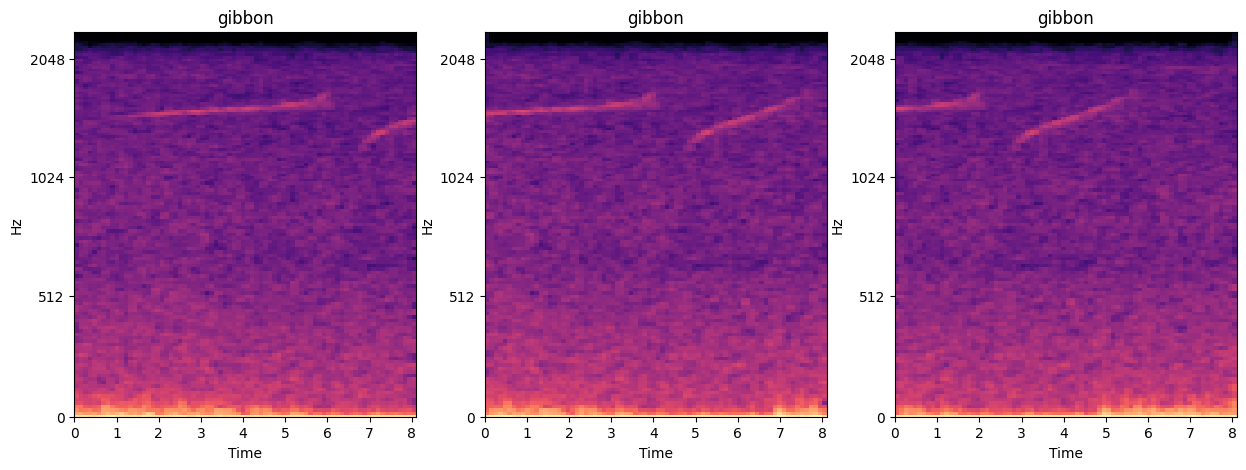

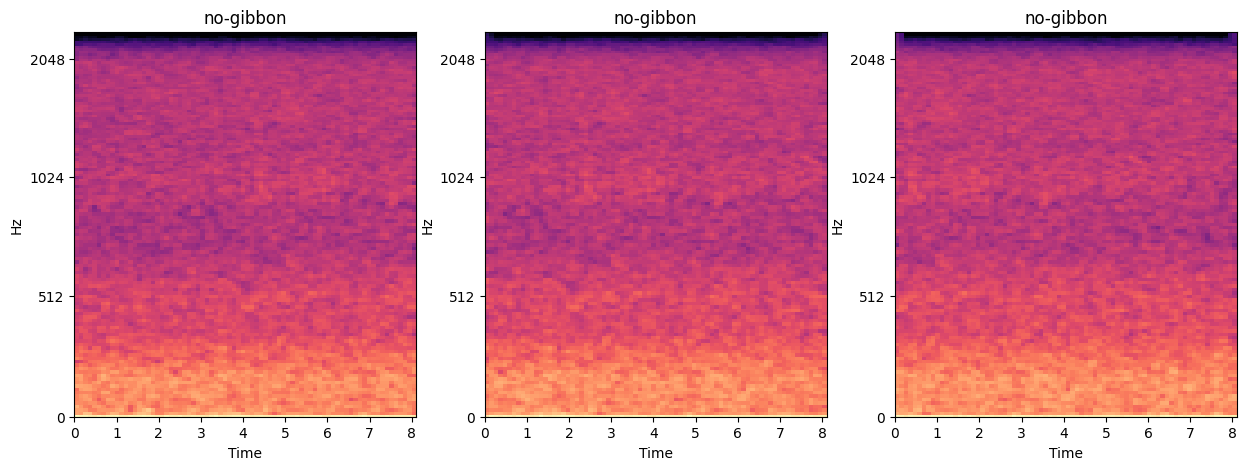

In [ ]:
# TO DO, implement a function called audio_to_spectrogram(audio) and visualisations as per instructions aboved

def audio_to_spectrogram(audio):
# apply the min max normalisation
  norm_audio=(audio-np.min(audio))/(np.max(audio)-np.min(audio))
# mel_spectrogram
  S=librosa.feature.melspectrogram(y=norm_audio,n_mels=n_mels,hop_length=hop_length,n_fft=n_fft,sr=4800)
  S_dB=librosa.power_to_db(S,ref=np.max)
  return S_dB

# Visualisation
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,5))
# gibbon present : the firts three entries of X are 'gibbon presence'
for i in range(3):
  plt.sca(ax[i])
  img=librosa.display.specshow(audio_to_spectrogram(X[i]),sr=4800, x_axis='time',y_axis='mel')
  ax[i].set_title(Y[i])

fig,ax=plt.subplots(1,3,figsize=(15,5))
# no-nogibbon : search for gibbon absence in Y using mask indexing.
for i in range(3):
  plt.sca(ax[i])
  img=librosa.display.specshow(audio_to_spectrogram(X[Y=='no-gibbon'][i]),sr=4800, x_axis='time',y_axis='mel')
  ax[i].set_title(Y[Y=='no-gibbon'][i])


## Task: Determine augmentation required

Look how many precense and absence examples are in the training data. In a normal situation you would have a lot more "absence" events, but this is an old code snippet and was deliberately created this way. So in practice this class balance would be a lot different. You'd have thousands of absence events, and very few presence events.

In [ ]:
unique, counts = np.unique(Y, return_counts=True)
original_distribution = dict(zip(unique, counts))
print('Data distribution:',original_distribution)

Data distribution: {'gibbon': 859, 'no-gibbon': 665}


In [ ]:
# TO DO implement your own data augmentation
# I implement an augmentation resulting of the combination of three augmentation traditionnal augmentation technique and one so_called 'flipping spectrogram'.

# My_augmentation= add_noise + spectrogram shiffting + pitch scale
import random
  # add noise
def add_noise(signal, noise_factor):
  """Returns an audio with noise"""
  noise = np.random.randn(len(signal))
  augmented_data = signal + noise_factor * noise
  augmented_data =augmented_data.astype(type(signal[0]))
  return augmented_data

  #spectogram shifting
def shift_spec(signal):
  """Returns the shift spectrogram of a signal"""
  spec = np.abs(librosa.stft(signal))
  shift = random.randint(0,len(spec))
  return np.roll(signal,shift=shift)

  #Pitch scale
def pitch_scale(signal,sr, num_semitones):
  """Returns a pitch shifted of signal"""
  return librosa.effects.pitch_shift(signal,sr=sr,n_steps=num_semitones)

  #Spectogram flipping
'''def flipping(audio):
  """Returns a flipped signal"""
  spec = np.abs(librosa.stft(audio))
  # Flip spectrogram horizontally
  flipped_spec = np.fliplr(spec)
  # Convert flipped spectrogram back to audio signal
  flipped_audio = librosa.istft(flipped_spec)
  return flipped_audio'''

def my_augmentation(n):
    """Create a signal obtained by combining: add_noise , spectrogram shiffting , pitch scale and spectrogram flipping"""
    aug_X=[]
    aug_Y=[]
    # repeat n times
    for i in range(0,n):
        for audio,target in zip(X,Y):
            #add noise
            audio=add_noise(audio,random.uniform(0,1)*10e-4)
            #Pitch scale
            audio=pitch_scale(audio,sr=4800,num_semitones=random.randint(1,10))
            #Spectogram shifting
            trans_audio=shift_spec(audio)
            # Add the newly created spectrogram to our new variable
            aug_X.append( trans_audio)

            # The target won't change, so a presence is still a presence,
            # and an absence is still an absence
            aug_Y.append(target)

    return np.asarray(aug_X) , np.asarray(aug_Y)



In [ ]:
augmented_X,augmented_Y=my_augmentation(5)
augmented_X.shape

(7620, 19200)

In [ ]:

X_new=np.vstack((X,augmented_X))
Y_new=np.concatenate((Y,augmented_Y))


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D, Input, MaxPooling1D, Flatten, Dense
from keras.models import Model
from sklearn.preprocessing import LabelEncoder

###get data ready for training

In [ ]:
# one_hot_encode Y_new
#define classes
classes=['gibbon','no-gibbon']
#encode the string array into integer labels
int_labels=[classes.index(cat) for cat in Y_new]
#convert integer labels to one-hot encoded vector
y=keras.utils.to_categorical(int_labels,num_classes=2)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size = 0.2, shuffle=True)
# add new axis to pass through 1D CNN
X_train=X_train[..., np.newaxis]
X_test=X_test[..., np.newaxis]


# Build an train a 1D CNN

In [ ]:
inputs = Input(shape=(19200,1))

x = inputs

x =Conv1D(filters=32, kernel_size=64, activation='relu')(x)
x = MaxPooling1D(pool_size=8)(x)
x = Conv1D(filters=64, kernel_size=64, activation='relu')(x)
x = MaxPooling1D(pool_size=8)(x)
x = Conv1D(filters=64, kernel_size=64, activation='relu')(x)
x = MaxPooling1D(pool_size=8)(x)
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

outputs = x

model = Model(inputs, outputs)

print(model.summary())
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 19200, 1)]        0         
                                                                 
 conv1d_52 (Conv1D)          (None, 19137, 32)         2080      
                                                                 
 max_pooling1d_48 (MaxPooli  (None, 2392, 32)          0         
 ng1D)                                                           
                                                                 
 conv1d_53 (Conv1D)          (None, 2329, 64)          131136    
                                                                 
 max_pooling1d_49 (MaxPooli  (None, 291, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_54 (Conv1D)          (None, 228, 64)           262

In [ ]:
# train the model
history = model.fit(X_train, y_train ,
                    epochs=6,
                    validation_split=0.2, batch_size=32)

Epoch 1/6
183/183 [==============================] - 10s 33ms/step - loss: 0.6473 - accuracy: 0.5836 - val_loss: 0.5882 - val_accuracy: 0.5967
Epoch 2/6
183/183 [==============================] - 5s 28ms/step - loss: 0.5374 - accuracy: 0.7292 - val_loss: 0.5012 - val_accuracy: 0.7854
Epoch 3/6
183/183 [==============================] - 5s 27ms/step - loss: 0.4898 - accuracy: 0.7801 - val_loss: 0.4522 - val_accuracy: 0.8011
Epoch 4/6
183/183 [==============================] - 5s 27ms/step - loss: 0.4367 - accuracy: 0.8013 - val_loss: 0.4477 - val_accuracy: 0.7963
Epoch 5/6
183/183 [==============================] - 5s 28ms/step - loss: 0.4124 - accuracy: 0.8134 - val_loss: 0.4001 - val_accuracy: 0.8202
Epoch 6/6
183/183 [==============================] - 5s 29ms/step - loss: 0.3966 - accuracy: 0.8201 - val_loss: 0.4050 - val_accuracy: 0.8216


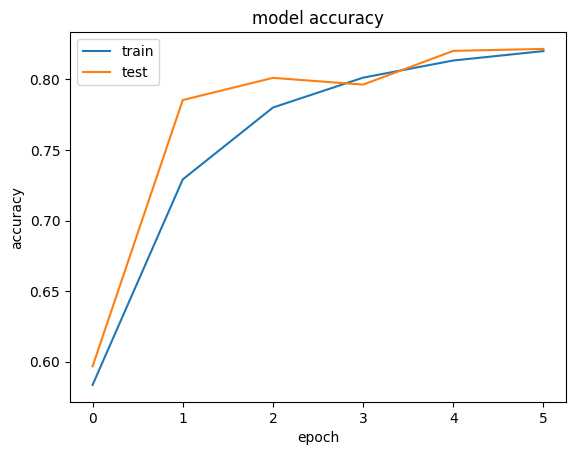

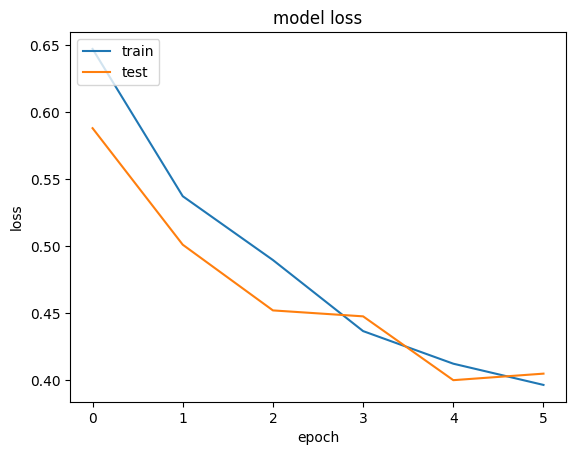

In [ ]:
# history visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print('accuracy on test set is: {}'.format(test_accuracy))

58/58 [==============================] - 1s 12ms/step - loss: 0.4093 - accuracy: 0.8382
accuracy on test set is: 0.8381629586219788


# Task: model training

Implement your own network and training. You will be evaluated on the decisions you make here. Typically more effort is proportional to the marks awarded. We will assess your thinking. You are free to do whatever you want and show/explain your reasoning. You are free to add text or anything else you want to share.

* Remember that you need to manually annotate this file: HGSM3D_0+1_20160429_051600 so you should train on that file too!

### convert all audios to spectrogram

In [ ]:
def convert_all_to_spec(audios):

      spectrograms = []
      for audio in audios:
          spectrograms.append(audio_to_spectrogram(audio))

      return np.array(spectrograms)

X_s=convert_all_to_spec(X_new)
X_s.shape

(9144, 128, 76)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_s,y,test_size = 0.2, shuffle=True)
# add new axis to pass through 2D CNN
X_train=X_train[..., np.newaxis]
X_test=X_test[..., np.newaxis]

In [ ]:
INPUT_SHAPE = (X_train.shape[1],X_train.shape[2], 1)

# Starting point
model = keras.Sequential()

# Create one convolutional layer
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 4, input_shape = INPUT_SHAPE, activation = 'relu'))

# Create one max pooling layer
model.add(keras.layers.MaxPool2D(pool_size = 2))

# Create another convolutional layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 4, activation = 'relu'))

# Create another max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=2))

# Create another convolutional layer
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))

# Create another max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=2))

model.add(Flatten())

# Here we create 16 fully connected units
model.add(Dense(units = 15, activation='relu'))

# The output
model.add(Dense(2, activation = 'softmax'))

# Here we tell the model how to improve/update the weights
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
183/183 [==============================] - 3s 10ms/step - loss: 0.5967 - accuracy: 0.7466 - val_loss: 0.3586 - val_accuracy: 0.8612
Epoch 2/10
183/183 [==============================] - 1s 8ms/step - loss: 0.2554 - accuracy: 0.9060 - val_loss: 0.2501 - val_accuracy: 0.9357
Epoch 3/10
183/183 [==============================] - 1s 8ms/step - loss: 0.1619 - accuracy: 0.9448 - val_loss: 0.2540 - val_accuracy: 0.9023
Epoch 4/10
183/183 [==============================] - 2s 10ms/step - loss: 0.1369 - accuracy: 0.9540 - val_loss: 0.1607 - val_accuracy: 0.9494
Epoch 5/10
183/183 [==============================] - 2s 9ms/step - loss: 0.1196 - accuracy: 0.9586 - val_loss: 0.1262 - val_accuracy: 0.9617
Epoch 6/10
183/183 [==============================] - 1s 8ms/step - loss: 0.1012 - accuracy: 0.9677 - val_loss: 0.1270 - val_accuracy: 0.9563
Epoch 7/10
183/183 [==============================] - 1s 8ms/step - loss: 0.0913 - accuracy: 0.9680 - val_loss: 0.1376 - val_accuracy: 0.9481
Epoc

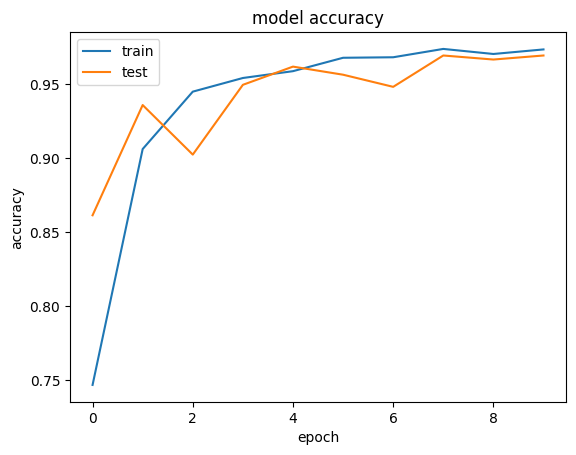

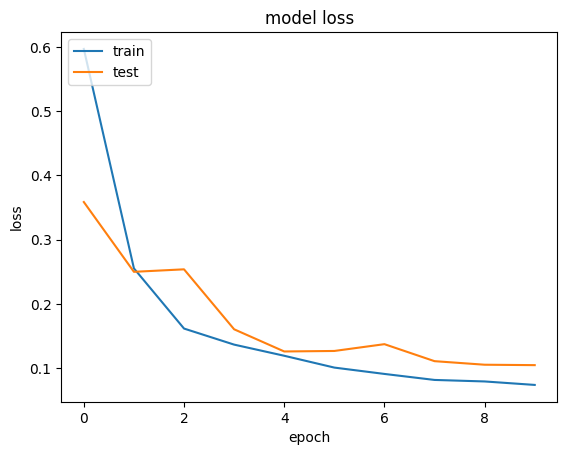

In [ ]:
# history visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print('accuracy on test set is: {}'.format(test_accuracy))

58/58 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9721
accuracy on test set is: 0.9721159338951111


In [ ]:
# TO DO

# build the 2D CNN
def build_model_2D(input_shape):
  #create model
  model=keras.Sequential()
  # 1st conv layer
  model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((3,3)))
  #2nd conv layer
  model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
  model.add(keras.layers.MaxPool2D((3,3)))
  # 3rd conv layer
  model.add(keras.layers.Conv2D(32,(2,2),activation='relu'))
  model.add(keras.layers.MaxPool2D((2,2)))
  model.add(keras.layers.Conv2D(64,(2,2),activation='relu'))
  model.add(keras.layers.MaxPool2D((2,2)))
  # flatten the ouput and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(60,activation='relu'))
  #ouput layers
  model.add(keras.layers.Dense(1,activation='sigmoid'))
  return model

# split the data into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X_s,y,test_size = 0.2, shuffle=True)
# add an extra dimension to X_train and X_test ( depth)
X_train=X_train[..., np.newaxis]
X_test=X_test[..., np.newaxis]

input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
model= build_model_2D(input_shape)
print(model.summary())
# compile the network
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])


# evaluate the CNN on the test set
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print('accuracy on test set is: {}'.format(test_accuracy))

# history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 74, 16)       160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 42, 24, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 40, 22, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 7, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 6, 32)         4128      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 3, 32)         

In [ ]:
history.history

{'loss': [-796056832.0,
  -99490463744.0,
  -1245877108736.0,
  -6560360169472.0,
  -22096251977728.0,
  -56924737372160.0,
  -122558921834496.0,
  -234237684875264.0,
  -407966729633792.0,
  -657614253850624.0,
  -1006664098512896.0,
  -1476506006061056.0,
  -2074893600423936.0,
  -2848080055500800.0,
  -3802436284186624.0,
  -4964091525332992.0,
  -6404263852900352.0,
  -8093691386265600.0,
  -1.0051880256274432e+16,
  -1.233319723270144e+16],
 'accuracy': [0.5680109262466431,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578,
  0.5681476593017578]}

In [ ]:
X_train.shape,y_train.shape

((7315, 128, 76, 1), (7315,))

# Task: Testing



*   Apply your model to each the test files ``(/Test_files/)``. There are 10 test files named ``check1.wav``, ..., ``check10.wav``, and there is an extra test file ``HGSM3BD_0+1_20160402_053600.wav``. Please predict on all of the test files separately.
*   Use a sliding window approach to predict on the full files (from the start to the end of each file).
*   Group the predictions so that you can identify calling bouts. Display the grouped predictions however you want.
*   Determine how you will evaluate the performance of your model! This is entirely up to you and you will be assessed for all of your choices. The more effort you put here, the higher your grade. However, nothing is prescribed, so you will have to think carefully how you want to approach this.
*   You should download the test data, open in SonicVisualiser, and check which files have calls and which don't to determine how good your model is doing. You don't have to demonstrate anything for this point. This is purely for your own checks.
*   You should add code that converts your model predictions into a corresponding ``.svl`` file. Your ``.svl`` files should have the same name as the test file. You will need to submit these ``.svl`` files with your submission. This is also a good opportunity to check that your model is working well through visual inspection.



### Test case 1

In [ ]:

# TO DO

### Test case 2

In [ ]:
# TO DO

### Test case 3

In [ ]:
# TO DO

### Test case 4

In [ ]:
# TO DO

### Test case 5

In [ ]:
# TO DO

### Test case 6

In [ ]:
# TO DO

### Test case 7

In [ ]:
# TO DO

### Test case 8

In [ ]:
# TO DO

### Test case 9

In [ ]:
# TO DO

### Test case 10

In [ ]:
# TO DO

## Test case: HGSM3BD_0+1_20160402_053600.wav

In [ ]:
# TO DO